In [1]:
from data_class import *
from create_statespace_class import *

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns
sns.set_theme(style="whitegrid")

np.random.seed(42)
# choose which app to look at between 'EVOKE' and 'MOMENT'
app = "EVOKE"

# get the data
paths = ['part-00000-tid-5172624987854127169-b1684884-bebf-43d9-bb55-f03708dbec1f-5531-1-c000.json',
         'part-00001-tid-5172624987854127169-b1684884-bebf-43d9-bb55-f03708dbec1f-5532-1-c000.json',
         'part-00002-tid-5172624987854127169-b1684884-bebf-43d9-bb55-f03708dbec1f-5533-1-c000.json',
         'part-00003-tid-5172624987854127169-b1684884-bebf-43d9-bb55-f03708dbec1f-5534-1-c000.json']

In [2]:
# create the data object
data = Data(paths, app)
N_pre = data.N

# create the state space
space = Space(app)

Creating data class object with 55323 observations
Creating state space class object


## Clean the Data

In [3]:
print("number of observations originally: {}".format(N_pre))
print("unique users {}".format(len(data.unique_IDs)))
print('unique states {}'.format(len(set(data.states))))

# clean data
data.clean()
N_post = data.N

print("number of observations originally: {}".format(N_pre))
print("number of observations after data.clean: {}".format(N_post))
print("number of observations removed in data.clean: {}".format(N_pre-N_post))
print("unique users {}".format(len(data.unique_IDs)))
print('unique states {}'.format(len(set(data.states))))

data.CF_clean()
N_pre = N_post
N_post = data.N

print("number of observations after data.CF_clean: {}".format(N_post))
print("number of observations removed in data.CF_clean: {}".format(N_pre-N_post))
print("unique users {}".format(len(data.unique_IDs)))
print('unique states {}'.format(len(set(data.states))))

number of observations originally: 49252
unique users 19885
unique states 431
Cleaning data class object with 49252 observations


100%|████████████████████████████████████████████████████████████████████████| 47651/47651 [00:00<00:00, 192547.70it/s]


Finished cleaning. Data class object now has 26466 observations
number of observations originally: 49252
number of observations after data.clean: 26466
number of observations removed in data.clean: 22786
unique users 12731
unique states 253


  1%|▌                                                                              | 43/5786 [00:00<00:13, 424.38it/s]

Remove duplicates, keeping the one with the highest usage count


100%|█████████████████████████████████████████████████████████████████████████████| 5786/5786 [00:13<00:00, 416.27it/s]


removeing 4383 programs due to duplicates
number of observations after data.CF_clean: 14265
number of observations removed in data.CF_clean: 12201
unique users 4913
unique states 247


In [4]:
49252-14265


34987

# Progress

In [4]:
# plot progress and the limit at 30

fig, ax1 = plt.subplots(1, 1, sharey=True, figsize=(8, 4))
sns.histplot(ax=ax1, x=data.progress, bins=50, stat='count', color='green')
#ax1.axvline((30), color='r', linestyle='--')
ax1.set_xlim(0, 100)
ax1.set_xlabel('Progress value',fontsize=16)
ax1.set_ylabel('Number of observations',fontsize=16)
plt.title('Progress',fontsize=20)
plt.tick_params(labelsize=13)
plt.savefig("clean_progress_hist.png")

# usage count

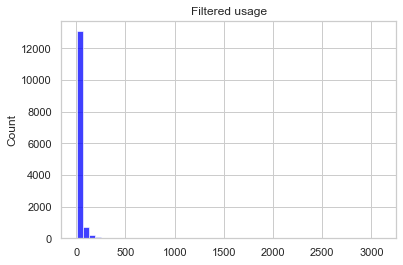

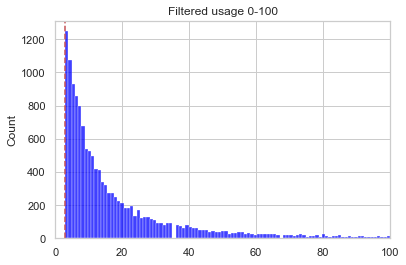

In [5]:
# plot usage count and limit 3

# histogram
fig, (ax1) = plt.subplots(1, 1, sharey=True, figsize=(6, 4))
sns.histplot(ax=ax1, x=data.usage, bins=50, stat='count',color='blue')
#ax1.axvline((3), color='r', linestyle='--')
#ax1.set_xlim(0, 100)
ax1.title.set_text('Filtered usage')
plt.savefig("clean_usage_hist_all.png")

# histogram for low values
usage_low = [i for i in data.usage if 0 <= i <= 100]

fig, (ax3) = plt.subplots(1, 1, sharey=True, figsize=(6, 4))
sns.histplot(ax=ax3, x=usage_low, bins=100, stat='count',color='blue')
ax3.axvline((3), color='r', linestyle='--')
ax3.set_xlim(0, 100)
ax3.title.set_text('Filtered usage 0-100')
plt.savefig("clean_usage_hist_100.png")

# boxplot
fig, (ax2) = plt.subplots(1, 1, sharey=True, figsize=(6, 4))
sns.boxplot(ax=ax2, x=data.usage,color='blue')
#ax2.axvline(np.mean(np.asarray(dataBI1[node])), color='r', linestyle='--')
#ax2.set_xlim(-4, 4)
ax2.title.set_text('Filtered usage box plot')
plt.savefig("clean_usage_box_all.png")



# duration

In [6]:
# plot duration days and limit 

# histogram
fig, (ax1) = plt.subplots(1, 1, sharey=True, figsize=(6, 4))
sns.histplot(ax=ax1, x=data.duration, bins=50, stat='count',color='purple')
#ax1.axvline((365*2), color='r', linestyle='--')
#ax1.set_xlim(0, 100)
ax1.title.set_text('Filtered duration days')
plt.savefig("clean_duration_hist_all.png")


# boxplot
fig, (ax2) = plt.subplots(1, 1, sharey=True, figsize=(6, 4))
sns.boxplot(ax=ax2, x=data.duration,color='purple')
#ax2.axvline(np.mean(np.asarray(dataBI1[node])), color='r', linestyle='--')
#ax2.set_xlim(-4, 4)
ax2.title.set_text('Filtered duration days box plot')
plt.savefig("clean_duration_box_all.png")


# programs per user

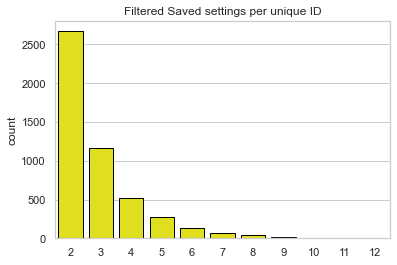

In [7]:
# plot histogram of number of programs per user

# histogram
fig, (ax1) = plt.subplots(1, 1, sharey=True, figsize=(6, 4))
sns.countplot(ax=ax1, x=data.ID_counts, color='yellow', edgecolor='black')
#ax1.axvline((20), color='r', linestyle='--')
#ax1.set_xlim(0, 100)
ax1.title.set_text('Filtered Saved settings per unique ID')
plt.savefig("clean_settings_per_ID_hist_all.png")


# boxplot
fig, (ax2) = plt.subplots(1, 1, sharey=True, figsize=(6, 4))
sns.boxplot(ax=ax2, x=data.ID_counts,color='yellow')
#ax2.axvline(np.mean(np.asarray(dataBI1[node])), color='r', linestyle='--')
#ax2.set_xlim(-4, 4)
ax2.title.set_text('Filtered Saved settings per unique ID box plot')
plt.savefig("clean_settings_per_ID_box_all.png")



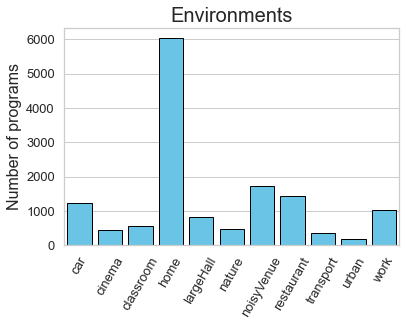

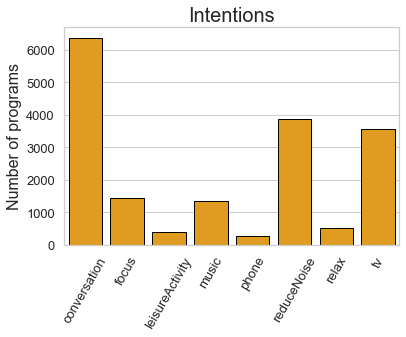

In [6]:
env_titles, env_counts = np.unique(np.asarray(data.envs), return_counts=True)

fig, (ax1) = plt.subplots(1, 1, sharey=True, figsize=(6,4))
sns.barplot(ax=ax1, x=env_titles, y=env_counts, color="#55CEFA", edgecolor='black')
#ax1.axhline((3000), color='r', linestyle='--')
plt.xticks(rotation=60)
ax1.set_ylabel('Number of programs',fontsize=16)
plt.title('Environments',fontsize=20)
plt.tick_params(labelsize=13)
plt.savefig("plots/clean_environments_hist_all.png", bbox_inches='tight')



# prevalence of each individual intention
intention_titles = space.intents.copy()
intention_titles.append('None')
intention_count = np.zeros(10)

for observation in data.intent_list:
    for intent in observation:
        for i, intention in enumerate(intention_titles):
            if intent == intention:
                intention_count[i] += 1

intention_titles2 = [title for i, title in enumerate(intention_titles) if intention_count[i] > 0]
intention_count2 = [count for i, count in enumerate(intention_count) if intention_count[i] > 0]


# histogram intents
fig, (ax1) = plt.subplots(1, 1, sharey=True, figsize=(6, 4))
sns.barplot(ax=ax1, x=intention_titles2, y=intention_count2, color="orange", edgecolor='black')
#ax1.axhline((1000), color='r', linestyle='--')
plt.xticks(rotation=60)
ax1.set_ylabel('Number of programs',fontsize=16)
plt.title('Intentions',fontsize=20)
plt.tick_params(labelsize=13)
plt.savefig("plots/clean_intents_hist_individual.png", bbox_inches='tight')



intent_titles, intent_counts = np.unique(np.asarray(data.intents), return_counts=True)


# histogram intents
fig, (ax1) = plt.subplots(1, 1, sharey=True, figsize=(4, 12))
sns.barplot(ax=ax1, y=intent_titles, x=intent_counts, color="orange", edgecolor='black')
#ax1.axhline((1000), color='r', linestyle='--')
#plt.xticks(rotation=90)
ax1.title.set_text('Intents')
plt.savefig("clean_intents_hist_all.png", bbox_inches='tight')





# states

[Text(0.5, 0, 'Number of settings in the state'),
 Text(0.5, 1.0, 'Clean States')]

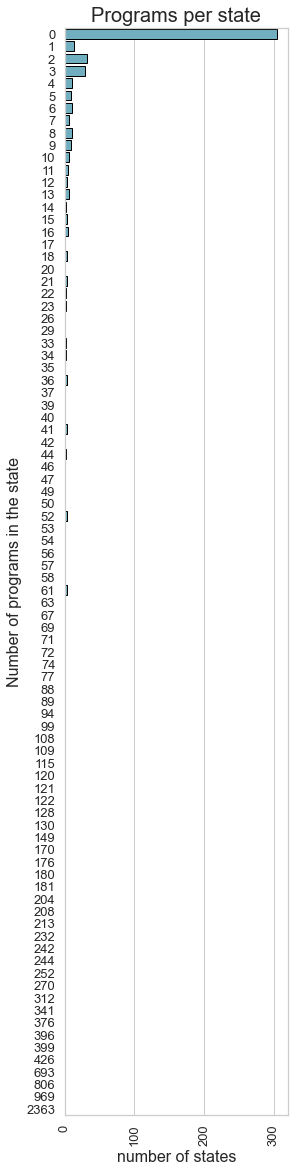

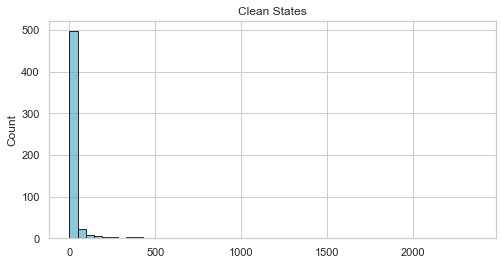

In [10]:
# how many states have x programs in them

state_titles, state_counts = np.unique(np.asarray(data.states), return_counts=True)
zeros = np.zeros(len(space.states)-len(state_titles))
state_counts2 = np.hstack((state_counts,zeros))
state_counts2 = state_counts2.astype(int)

fig, (ax1) = plt.subplots(1, 1, sharey=True, figsize=(4, 20))
sns.countplot(ax=ax1, y=state_counts2, color="c", edgecolor='black')
#ax1.axhline((1000), color='r', linestyle='--')
plt.xticks(rotation=90)
ax1.set_ylabel('Number of programs in the state',fontsize=16)
ax1.set_xlabel('number of states',fontsize=16)
plt.title('Programs per state',fontsize=20)
plt.tick_params(labelsize=13)
plt.savefig("plots/clean_programs_per_state.png", bbox_inches='tight')

fig, (ax1) = plt.subplots(1, 1, sharey=True, figsize=(8, 4))
sns.histplot(ax=ax1, x=state_counts2, bins=50, color="c", edgecolor='black')
#ax1.axhline((1000), color='r', linestyle='--')
#plt.xticks(rotation=90)
ax1.title.set_text('Clean States')

fig, (ax1) = plt.subplots(1, 1, sharey=True, figsize=(8, 4))
sns.boxplot(ax=ax1, x=state_counts2, color="c")
#ax1.axhline((1000), color='r', linestyle='--')
#plt.xticks(rotation=90)
ax1.set(xlabel='Number of settings in the state',
       title='Clean States')


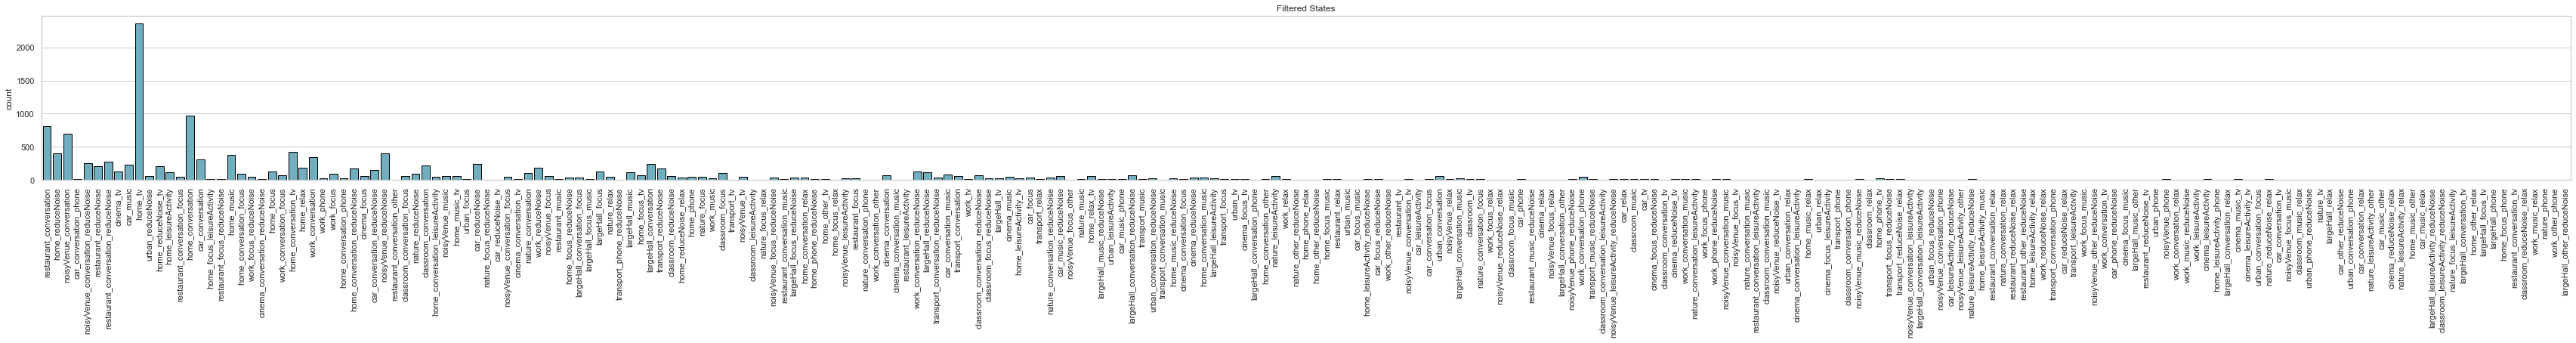

In [10]:
# histogram states all
fig, (ax1) = plt.subplots(1, 1, sharey=True, figsize=(60, 4))
sns.countplot(ax=ax1, x=data.states, color="c", edgecolor='black')
#ax1.axhline((1000), color='r', linestyle='--')
plt.xticks(rotation=90)
ax1.title.set_text('Filtered States')
plt.savefig("clean_states_hist_all_horizontal.png")


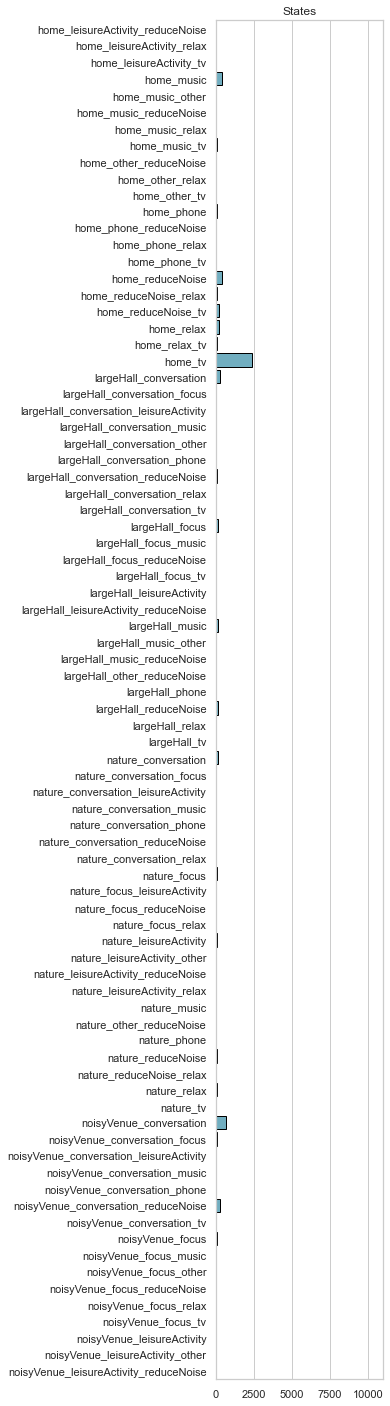

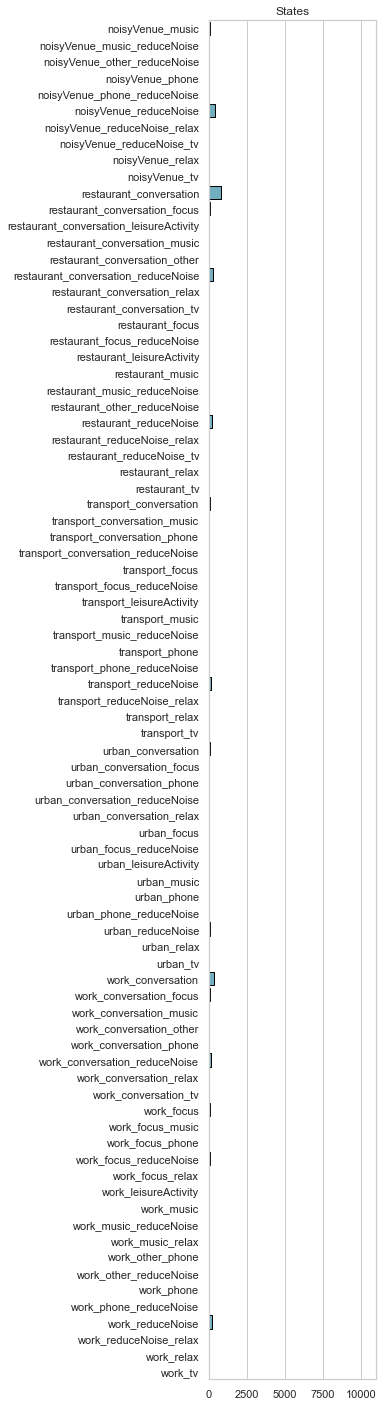

In [11]:
# sort the states alphabetically and then split them in 2 to make 2 plots
state_titles, state_counts = np.unique(np.asarray(data.states), return_counts=True)
third = len(state_titles)//3
state_titles1 = state_titles[:third]
state_counts1 = state_counts[:third]
state_titles2 = state_titles[third:2*third]
state_counts2 = state_counts[third:2*third]
state_titles3 = state_titles[2*third:]
state_counts3 = state_counts[2*third:]

fig, (ax1) = plt.subplots(1, 1, sharey=False, figsize=(3, 25))
sns.barplot(ax=ax1, y=state_titles1, x=state_counts1, color='c', edgecolor='black')
ax1.title.set_text('States')
ax1.set_xlim(0, 11000)
plt.savefig("states_hist_half_vertical1.png")

fig, (ax2) = plt.subplots(1, 1, sharey=False, figsize=(3, 25))
sns.barplot(ax=ax2, y=state_titles2, x=state_counts2, color='c', edgecolor='black')
ax2.title.set_text('States')
ax2.set_xlim(0, 11000)
plt.savefig("states_hist_half_vertical2.png")

fig, (ax2) = plt.subplots(1, 1, sharey=False, figsize=(3, 25))
sns.barplot(ax=ax2, y=state_titles3, x=state_counts3, color='c', edgecolor='black')
ax2.title.set_text('States')
ax2.set_xlim(0, 11000)
plt.savefig("states_hist_half_vertical3.png")

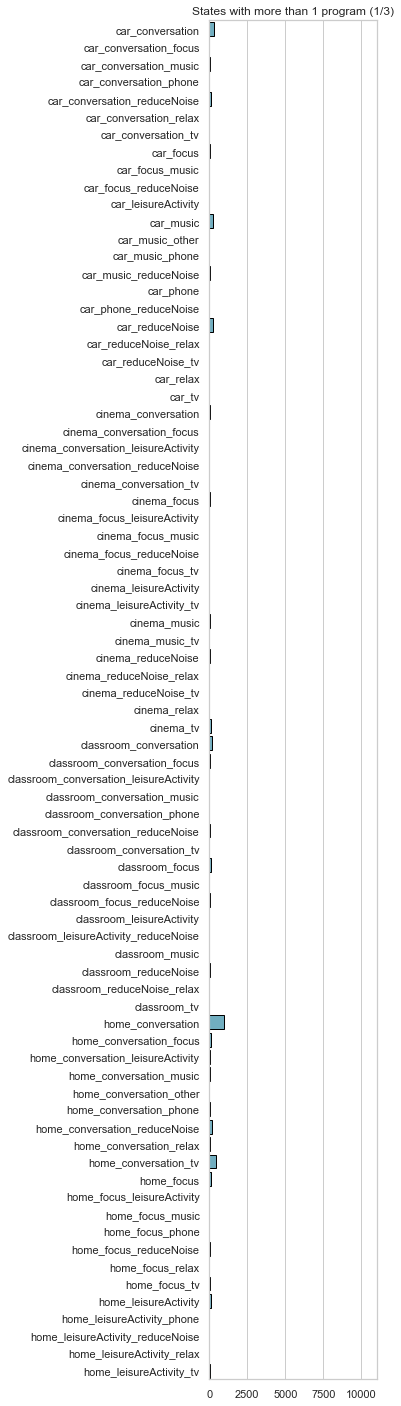

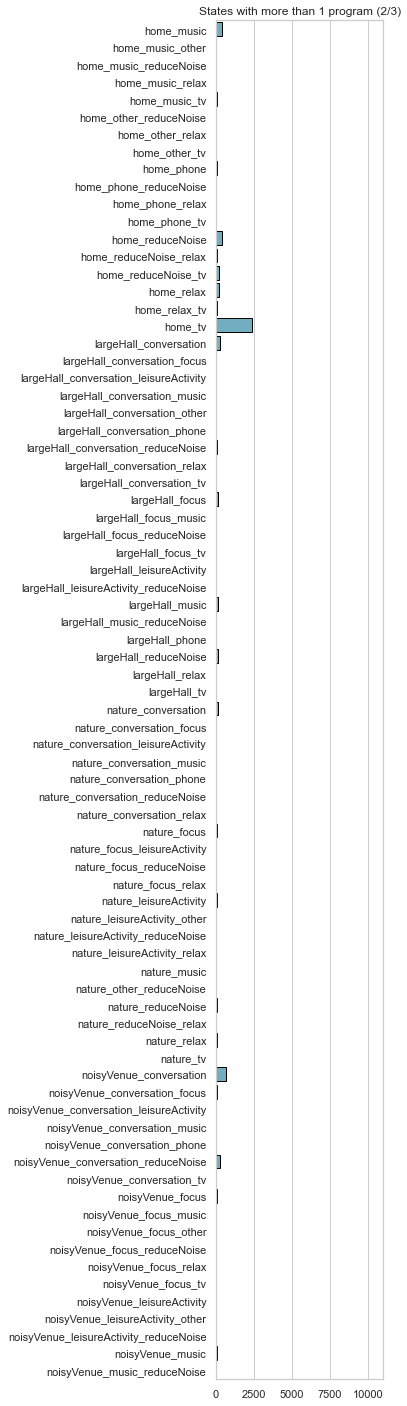

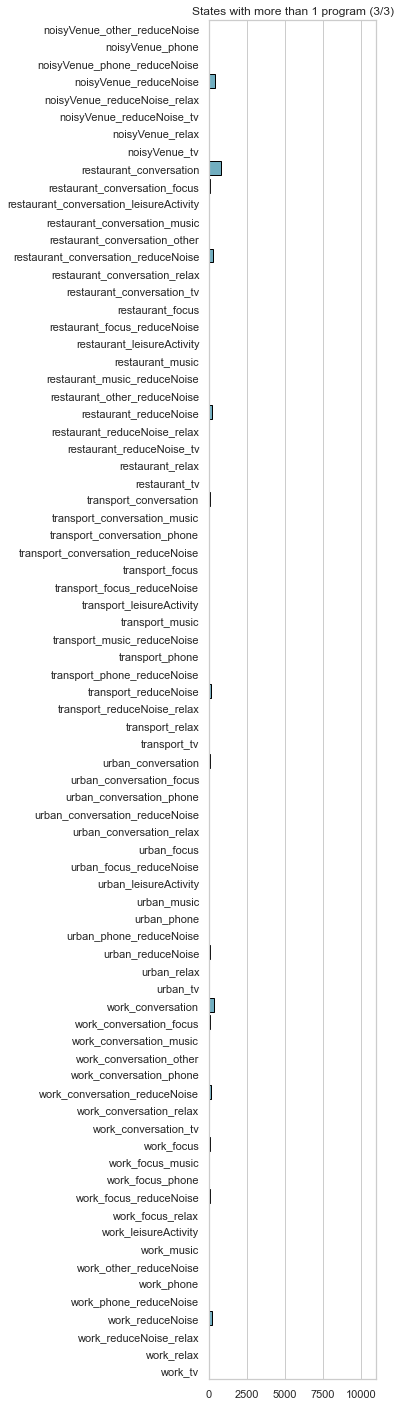

In [12]:
# Make several state plots
state_titles, state_counts = np.unique(np.asarray(data.states), return_counts=True)
state_titles_over1 = [title for i, title in enumerate(state_titles) if state_counts[i] != 1]
state_counts_over1 = [count for count in state_counts if count != 1]
third = len(state_titles_over1)//3
state_titles1 = state_titles_over1[:third]
state_counts1 = state_counts_over1[:third]
state_titles2 = state_titles_over1[third:2*third]
state_counts2 = state_counts_over1[third:2*third]
state_titles3 = state_titles_over1[2*third:]
state_counts3 = state_counts_over1[2*third:]

fig, (ax1) = plt.subplots(1, 1, sharey=False, figsize=(3, 25))
sns.barplot(ax=ax1, y=state_titles1, x=state_counts1, color='c', edgecolor='black')
ax1.title.set_text('States with more than 1 program (1/3)')
ax1.set_xlim(0, 11000)
plt.savefig("states_hist_half_vertical1.png")

fig, (ax2) = plt.subplots(1, 1, sharey=False, figsize=(3, 25))
sns.barplot(ax=ax2, y=state_titles2, x=state_counts2, color='c', edgecolor='black')
ax2.title.set_text('States with more than 1 program (2/3)')
ax2.set_xlim(0, 11000)
plt.savefig("states_hist_half_vertical2.png")

fig, (ax2) = plt.subplots(1, 1, sharey=False, figsize=(3, 25))
sns.barplot(ax=ax2, y=state_titles3, x=state_counts3, color='c', edgecolor='black')
ax2.title.set_text('States with more than 1 program (3/3)')
ax2.set_xlim(0, 11000)
plt.savefig("states_hist_half_vertical3.png")

# distribution of learned best setting

In [12]:
#  data.settings is a list of arrays and we need it to be a matrix

settings_matrix = np.asarray(data.settings)

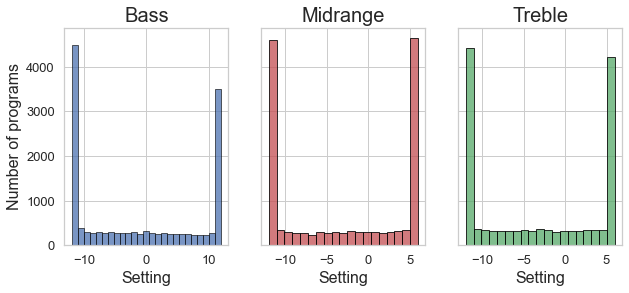

In [14]:
# plot the best learned settings histograms
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(10, 4))
sns.histplot(ax=ax1, x=settings_matrix[:,0], stat='count', bins=25, color='b', edgecolor='black')
ax1.set_ylabel('Number of programs',fontsize=16)
ax1.set_xlabel('Setting',fontsize=16)
ax1.set_title('Bass',fontsize=20)
ax1.tick_params(labelsize=13)

sns.histplot(ax=ax2, x=settings_matrix[:,1], stat='count', bins=19,color='r', edgecolor='black')
#ax2.title.set_text('Midrange')
#ax1.set_ylabel('Number of programs',fontsize=16)
ax2.set_xlabel('Setting',fontsize=16)
ax2.set_title('Midrange',fontsize=20)
ax2.tick_params(labelsize=13)

sns.histplot(ax=ax3, x=settings_matrix[:,2], stat='count', bins=19,color='g', edgecolor='black')
#ax3.title.set_text('Treble')
ax3.set_xlabel('Setting',fontsize=16)
ax3.set_title('Treble',fontsize=20)
ax3.tick_params(labelsize=13)
plt.savefig("plots/clean_barplot_settings.png", bbox_inches='tight')


In [15]:
# 3D plot af best settings (we want density, but we have this for now)

def get_3d_setting(state, thresh=0, verbose=False, get_all=False):
    # get settings for the desired state
    if get_all:
        set_state = data.settings
        state= "All data"
    else:
        set_state = [setting for i, setting in enumerate(data.settings) if data.states[i] == state]
    set_state = np.asarray(set_state)
    if verbose:
        print("Number of settings in {} is {}".format(state, len(set_state)))


    # count how many times each setting occurs
    # make a matrix of the "setting space" spanned by the bass, midrange and treble value options
    # count how many times each appears in the settings for the state
    state_matrix = np.zeros((25, 19, 19))
    for setting in set_state:
        state_matrix[int(setting[0]+12),int(setting[1]+12),int(setting[2]+12)] += 1
    
    if verbose:
        max_val = np.max(state_matrix)
        print("percentage of settings in most popular value is {}".format(100/len(set_state)*max_val))
        x = sorted(state_matrix.flatten())
        print("percentage of settings in 3 most popular values is {}".format(100/len(set_state)*(x[-1]+x[-2]+x[-3])))
    
    # make one vector 
    setting_count = np.zeros(set_state.shape[0])
    for i, setting in enumerate(set_state):
        setting_count[i] = state_matrix[int(setting[0]+12),int(setting[1]+12),int(setting[2]+12)]

    # remove the dots that represent settings with less than threshold instances
    remove = [i for i, count in enumerate(setting_count) if count < thresh]
    for i in sorted(remove, reverse=True):
        set_state = np.delete(set_state,i,0)
        setting_count = np.delete(setting_count,i)
    return set_state, setting_count, state_matrix




In [18]:
def cube_plot(state, set_state, setting_count,threshold, show=False, save=False):
    # make plot with chosen set from matrix
    fig = plt.figure(figsize =(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(set_state[:,0], set_state[:,1], set_state[:,2])
    pnt3d=ax.scatter(set_state[:,0], set_state[:,1], set_state[:,2],c=setting_count, s=setting_count**1.25, cmap='plasma', label=state,edgecolor='face')
    ax.set_xlabel('Bass', fontsize=16)
    ax.set_ylabel('Midrange', fontsize=16)
    ax.set_zlabel('Treble', fontsize=16)
    ax.set_xlim(-12, 12)
    ax.set_ylim(-12, 6)
    ax.set_zlim(-12, 6)
    ax.tick_params(labelsize=13)
    cbar=plt.colorbar(pnt3d)
    cbar.set_label("Count", fontsize=16)
    cbar.ax.tick_params(labelsize=13)
    plt.title(r'Shows state: {}'.format(state),fontsize=20)
    if save:
        plt.savefig(f"plots\clean_cube_{state}_{threshold}.png", bbox_inches='tight')
    if show:
        plt.show()
    else:
        if not show:
            plt.close()

In [21]:
state = 'All data'
threshold = 2
set_state, setting_count, state_matrix = get_3d_setting(state, threshold, verbose=True, get_all=True)
cube_plot(state, set_state, setting_count, threshold, show=True, save=True)

Number of settings in All data is 14265
percentage of settings in most popular value is 6.133894146512443
percentage of settings in 3 most popular values is 15.541535226077812


In [28]:
# choose state and threshold
state = 'home_conversation'
threshold = 2
set_state, setting_count, state_matrix = get_3d_setting(state, threshold, verbose=True, get_all=False)
cube_plot(state, set_state, setting_count, threshold, show=True, save=True)


Number of settings in home_conversation is 969
percentage of settings in most popular value is 5.675954592363261
percentage of settings in 3 most popular values is 15.170278637770897


In [ ]:
# cube of all data

In [35]:

# loop over all unique states and create dataframe with percentages
state_titles, state_counts = np.unique(np.asarray(data.states), return_counts=True)
threshold = 0
rows = []
for state in state_titles:
    set_state, setting_count, state_matrix = get_3d_setting(state, threshold, verbose=False)
    cube_plot(state, set_state, setting_count,threshold, show=False, save=True)
    max_val = np.max(state_matrix)
    x = sorted(state_matrix.flatten())
    c3 = None
    c4 = None
    if len(set_state)*max_val != 0:
        c3 = 100/len(set_state)*max_val
    if len(set_state)*(x[-1]+x[-2]+x[-3]) != 0:
        c4 = 100/len(set_state)*(x[-1]+x[-2]+x[-3])
    rows.append([state, len(set_state), c3, c4])
    
df_perc = pd.DataFrame(rows, columns=["state", "count", "max", "max 3"])
final_df = df_perc.sort_values(by=['max 3'], ascending=False)
print(final_df)

                                     state  count        max       max 3
170           noisyVenue_other_reduceNoise      3  33.333333  100.000000
58   classroom_leisureActivity_reduceNoise      2  50.000000  100.000000
88                        home_music_other      3  33.333333  100.000000
141           nature_leisureActivity_other      2  50.000000  100.000000
226                            urban_relax      3  33.333333  100.000000
..                                     ...    ...        ...         ...
47                  classroom_conversation    350   6.285714   14.000000
177                          noisyVenue_tv     60   5.000000   13.333333
178                restaurant_conversation   1435   5.714286   13.240418
86                 home_leisureActivity_tv     39   5.128205   12.820513
112     largeHall_conversation_reduceNoise     94   6.382979   12.765957

[253 rows x 4 columns]
